In [262]:
import pandas as pd

data = pd.read_csv('mumbai_houses_task_filtred.csv')
data

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,13500000,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,19500000,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,20000000,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,11000000,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Выделение целевого признака и предикторов

In [263]:
y = data['price']
X = data.drop(['price', 'type_of_building', 'furnished_status', 'status', 'neworold'], axis=1)
y

0       22400000
1       35000000
2       31700000
3       18700000
4       13500000
          ...   
6232    19500000
6233    22000000
6234    20000000
6235    11000000
6236    15000000
Name: price, Length: 6237, dtype: int64

In [264]:
X

,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
0,629,19.032800,72.896357,2,2,0,0,0
1,974,19.032800,72.896357,3,2,0,0,0
2,968,19.085600,72.909277,3,3,0,0,0
3,629,19.155756,72.846862,2,2,2,2,2
4,1090,19.177555,72.849887,2,2,0,0,0
...,...,...,...,...,...,...,...,...
6232,810,19.138320,72.810020,2,2,0,0,0
6233,1400,19.221920,72.854250,3,3,1,1,1
6234,750,19.144320,72.824111,2,2,0,0,0
6235,700,19.047201,72.872225,2,2,0,0,0


# Разбиение на обучающую и тестовую выборки

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4989, 8), (4989,), (1248, 8), (1248,))

# Использование моделей для обучения

In [266]:
# Импорт моделей обучения
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Импорт метрик качества
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [267]:
# Функция для отображения оценки предсказанных значений относительно реальных
from math import sqrt

def errors(predict_array):
    print(
        f'MAE = {mean_absolute_error(y_true=y_test, y_pred=predict_array)}',
        f'MSE = {mean_squared_error(y_true=y_test, y_pred=predict_array)}',
        f'RMSE = {sqrt(mean_squared_error(y_true=y_test, y_pred=predict_array))}',
        f'MAPE = {mean_absolute_percentage_error(y_true=y_test, y_pred=predict_array)}',
        f'R^2 = {r2_score(y_true=y_test, y_pred=predict_array)}',
        sep='\n'
    )

In [268]:
# Предсказания для тестовой выборки (Линейная регрессия)
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
errors(y_pred_lr)
lr.coef_

MAE = 8456191.889694806
MSE = 198641574309387.6
RMSE = 14094026.192305291
MAPE = 0.5270825230113141
R^2 = 0.667797583854167


array([ 2.15868844e+04, -8.38332971e+07, -7.63668452e+07,  5.20583318e+05,
        7.86716578e+06, -4.13564742e+04, -4.13564742e+04, -4.13564742e+04])

In [269]:
# Маштабирование данных

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [270]:
# L1 модель (Lasso)
lasso = Lasso(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
errors(y_pred_lasso)
lasso.coef_

MAE = 8456191.785820922
MSE = 198641572122852.1
RMSE = 14094026.114735708
MAPE = 0.5270825002253033
R^2 = 0.6677975875108657


array([ 1.40052940e+07, -9.24993536e+06, -4.43611565e+06,  3.95950541e+05,
        6.15341351e+06, -1.60490174e+05, -2.08889549e-10, -1.19285453e-10])

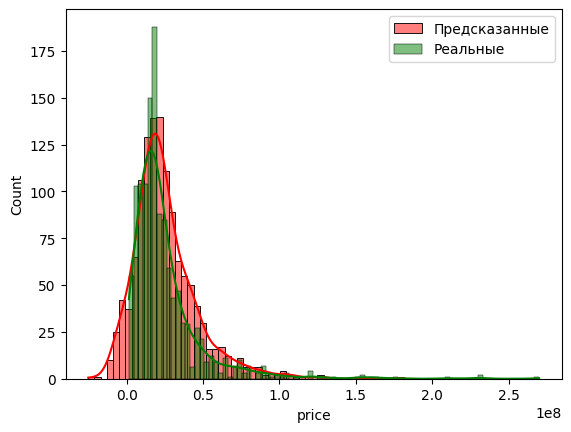

In [271]:
# Визуализация y_true и y_pred_lasso

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_lasso, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

In [272]:
# L2 модель (Ridge)
ridge = Ridge(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
errors(y_pred_ridge)
ridge.coef_

MAE = 8455785.366141163
MSE = 198642381308387.34
RMSE = 14094054.82139144
MAPE = 0.527033828220745
R^2 = 0.6677962342524109


array([14002675.40084185, -9249186.22733439, -4435728.81373791,
         398339.35903493,  6152835.67947753,   -53383.19571208,
         -53383.195712  ,   -53383.19571203])

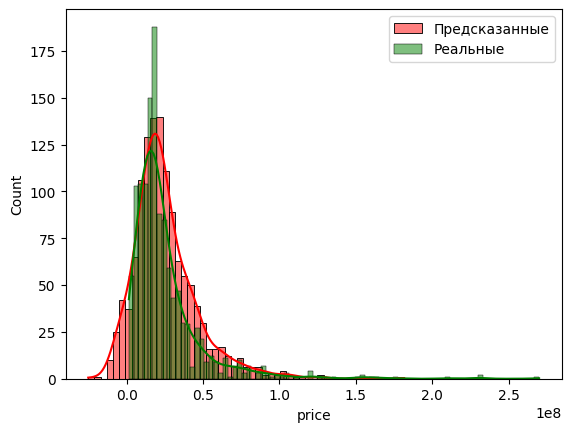

In [273]:
# Визуализация y_true и y_pred_ridge

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_ridge, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

In [274]:
# Elastic Net (комбинация L1 и L2)
el = ElasticNet(alpha=0.5, max_iter=50000).fit(X_train, y_train)
y_pred_el = el.predict(X_test)
errors(y_pred_el)
el.coef_

MAE = 10035164.050020652
MSE = 271481986721159.6
RMSE = 16476710.43385662
MAPE = 0.6082238543268974
R^2 = 0.5459813876204362


array([   26347.36872594, -3666628.07492261,  -910083.43660872,
        1775282.06911998,  4776638.10541104,  -392225.372248  ,
        -392225.37127794,  -392225.37202208])

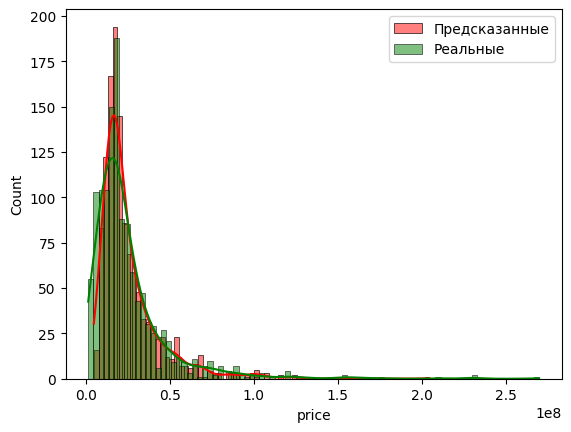

In [275]:
# Визуализация y_true и y_pred_el

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_el, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

In [276]:
# Полиномиальная регрессия

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_scaled)
X_test_p = poly.transform(X_test_scaled)
lr2 = LinearRegression().fit(X_train_p, y_train)
y_pred_p = lr2.predict(X_test_p)
errors(y_pred_p)
lr2.coef_

MAE = 7348851.80026405
MSE = 172170176201007.6
RMSE = 13121363.351458857
MAPE = 0.3967214493419388
R^2 = 0.7120675834297114


array([ 1.06053487e+07, -8.73696195e+06, -6.49485775e+06,  2.43833370e+06,
        1.40837392e+06,  8.72185869e+04,  8.72185869e+04,  8.72185869e+04,
       -9.34307322e+05, -4.81235326e+06, -3.71634662e+06,  1.29091072e+06,
        1.00528508e+06,  2.38670185e+05,  2.38670185e+05,  2.38670185e+05,
        4.74350627e+05,  3.22109028e+06, -6.92043619e+05, -2.11101178e+06,
        1.76444456e+05,  1.76444456e+05,  1.76444456e+05,  4.06958771e+05,
        1.02521664e+06, -1.29682434e+06, -4.70051840e+03, -4.70051840e+03,
       -4.70051840e+03, -2.45982234e+05, -3.55098168e+05, -8.41519521e+03,
       -8.41519521e+03, -8.41519521e+03,  7.46560955e+05,  1.61480485e+05,
        1.61480485e+05,  1.61480485e+05, -1.19680169e+05, -1.19680169e+05,
       -1.19680169e+05, -1.19680169e+05, -1.19680169e+05, -1.19680169e+05])

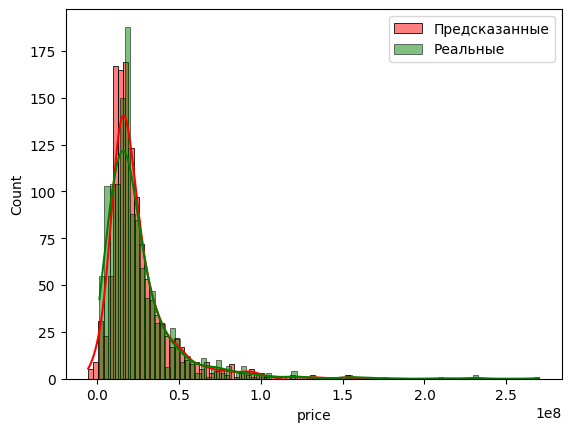

In [277]:
# Визуализация y_true и y_pred_p

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_p, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

# Поиск оптимального гиперпараметра для моделей 

In [278]:
# Импорт методов для подбора гиперпараметра
from hyperparameter_search import hyperparameter_search
import numpy as np

In [281]:
from hyperparameter_search import hyperparameter_search

models, methods = ('lasso', 'ridge', 'elasticnet'), ('GridSearchCV', 'RandomizedSearchCV')
parameters = {
    'lasso': {'lasso__alpha': np.arange(0.1, 10.1, 0.1)},
    'ridge': {'ridge__alpha': np.arange(0.1, 10.1, 0.1)},
    'elasticnet': {'elasticnet__alpha': np.arange(0.1, 10.1, 0.1), 'elasticnet__l1_ratio': np.arange(0.1, 1.1, 0.1)}
}

best_parameters = {}

for model in models:
    for method in methods:
        best_parameter = hyperparameter_search(model_name=model, method_search=method, parameters=parameters[model], X_train=X_train, y_train=y_train)
        best_parameters[f'{model}_{method}'] = best_parameter
        print(f'Лучший параметр для {model.capitalize()} методом {method}: {best_parameter}')

print(best_parameters)

Лучший параметр для Lasso методом GridSearchCV: {'lasso__alpha': np.float64(1.0)}
Лучший параметр для Lasso методом RandomizedSearchCV: {'lasso__alpha': np.float64(0.8)}
Лучший параметр для Ridge методом GridSearchCV: {'ridge__alpha': np.float64(10.0)}
Лучший параметр для Ridge методом RandomizedSearchCV: {'ridge__alpha': np.float64(9.700000000000001)}
Лучший параметр для Elasticnet методом GridSearchCV: {'elasticnet__alpha': np.float64(0.1), 'elasticnet__l1_ratio': np.float64(0.9)}
Лучший параметр для Elasticnet методом RandomizedSearchCV: {'elasticnet__l1_ratio': np.float64(1.0), 'elasticnet__alpha': np.float64(1.9000000000000001)}
{'lasso_GridSearchCV': {'lasso__alpha': np.float64(1.0)}, 'lasso_RandomizedSearchCV': {'lasso__alpha': np.float64(0.8)}, 'ridge_GridSearchCV': {'ridge__alpha': np.float64(10.0)}, 'ridge_RandomizedSearchCV': {'ridge__alpha': np.float64(9.700000000000001)}, 'elasticnet_GridSearchCV': {'elasticnet__alpha': np.float64(0.1), 'elasticnet__l1_ratio': np.float64(0